<a href="https://colab.research.google.com/github/juli-ter/Course3_work/blob/main/Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import interpolate
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import calendar
import seaborn as sns


In [3]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
path = "/content/drive/MyDrive/Course_3/"


In [6]:
ru = pd.read_csv(path+'ru_visual_all.csv', index_col='id')
en = pd.read_csv(path+'en_visual_all.csv', index_col='id')


In [30]:
ru

,date,best_topic_weights,best_topic_label,sentiment_an,tones
id,,,,,
0,Wed Apr 22 12:50:58 +0000 2020,0.276573,1,"{'Когнитив': 0.1, 'Интуиция': 0.1, 'Общество':...","{'skip': 0.40734341740608215, 'neutral': 0.250..."
1,Wed Apr 15 18:30:08 +0000 2020,0.559054,13,"{'Сравнение': 0.13333333333333333, 'Стимул': 0...","{'skip': 0.6926519870758057, 'negative': 0.294..."
2,Tue May 05 09:08:05 +0000 2020,0.193128,14,"{'Действие': 0.125, 'Негатив': 0.125, 'Гнев': ...","{'negative': 0.8354935646057129, 'positive': 0..."
3,Tue Mar 17 09:06:58 +0000 2020,0.152272,5,"{'Общество': 0.3333333333333333, 'Досуг': 0.16...","{'neutral': 0.7663036584854126, 'negative': 0...."
4,Fri Mar 27 18:18:40 +0000 2020,0.218490,7,"{'Действие': 0.125, 'Позитив': 0.125, 'Успех':...","{'neutral': 0.9304682612419128, 'negative': 0...."
...,...,...,...,...,...
138959,Fri Apr 17 10:14:57 +0000 2020,0.347867,13,"{'Работа': 0.3333333333333333, 'Сравнение': 0....","{'neutral': 0.9961855411529541, 'skip': 0.1366..."
138960,Thu May 21 09:21:21 +0000 2020,0.433196,6,"{'Когнитив': 0.25, 'Несоответствие': 0.25, 'Де...","{'neutral': 0.9740526676177979, 'negative': 0...."
138962,Wed Apr 15 10:25:34 +0000 2020,0.266337,17,"{'Общество': 0.05555555555555555, 'Включение':...","{'neutral': 0.5544804334640503, 'negative': 0...."


In [31]:
ru.loc[:,'date_cor'] = pd.to_datetime(ru['date'], format='%a %b %d %H:%M:%S %z %Y')
ru

,date,best_topic_weights,best_topic_label,sentiment_an,tones,date_cor
id,,,,,,
0,Wed Apr 22 12:50:58 +0000 2020,0.276573,1,"{'Когнитив': 0.1, 'Интуиция': 0.1, 'Общество':...","{'skip': 0.40734341740608215, 'neutral': 0.250...",2020-04-22 12:50:58+00:00
1,Wed Apr 15 18:30:08 +0000 2020,0.559054,13,"{'Сравнение': 0.13333333333333333, 'Стимул': 0...","{'skip': 0.6926519870758057, 'negative': 0.294...",2020-04-15 18:30:08+00:00
2,Tue May 05 09:08:05 +0000 2020,0.193128,14,"{'Действие': 0.125, 'Негатив': 0.125, 'Гнев': ...","{'negative': 0.8354935646057129, 'positive': 0...",2020-05-05 09:08:05+00:00
3,Tue Mar 17 09:06:58 +0000 2020,0.152272,5,"{'Общество': 0.3333333333333333, 'Досуг': 0.16...","{'neutral': 0.7663036584854126, 'negative': 0....",2020-03-17 09:06:58+00:00
4,Fri Mar 27 18:18:40 +0000 2020,0.218490,7,"{'Действие': 0.125, 'Позитив': 0.125, 'Успех':...","{'neutral': 0.9304682612419128, 'negative': 0....",2020-03-27 18:18:40+00:00
...,...,...,...,...,...,...
138959,Fri Apr 17 10:14:57 +0000 2020,0.347867,13,"{'Работа': 0.3333333333333333, 'Сравнение': 0....","{'neutral': 0.9961855411529541, 'skip': 0.1366...",2020-04-17 10:14:57+00:00
138960,Thu May 21 09:21:21 +0000 2020,0.433196,6,"{'Когнитив': 0.25, 'Несоответствие': 0.25, 'Де...","{'neutral': 0.9740526676177979, 'negative': 0....",2020-05-21 09:21:21+00:00
138962,Wed Apr 15 10:25:34 +0000 2020,0.266337,17,"{'Общество': 0.05555555555555555, 'Включение':...","{'neutral': 0.5544804334640503, 'negative': 0....",2020-04-15 10:25:34+00:00


In [32]:
ru.loc[:, 'weekday'] = ru.date_cor.dt.weekday
ru.loc[:, 'week'] = ru.date_cor.dt.week
ru.loc[:, 'hour'] = ru.date_cor.dt.hour
ru.loc[:, 'month'] = ru.date_cor.dt.month


ru

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,date,best_topic_weights,best_topic_label,sentiment_an,tones,date_cor,weekday,week,hour,month
id,,,,,,,,,,
0,Wed Apr 22 12:50:58 +0000 2020,0.276573,1,"{'Когнитив': 0.1, 'Интуиция': 0.1, 'Общество':...","{'skip': 0.40734341740608215, 'neutral': 0.250...",2020-04-22 12:50:58+00:00,2,17,12,4
1,Wed Apr 15 18:30:08 +0000 2020,0.559054,13,"{'Сравнение': 0.13333333333333333, 'Стимул': 0...","{'skip': 0.6926519870758057, 'negative': 0.294...",2020-04-15 18:30:08+00:00,2,16,18,4
2,Tue May 05 09:08:05 +0000 2020,0.193128,14,"{'Действие': 0.125, 'Негатив': 0.125, 'Гнев': ...","{'negative': 0.8354935646057129, 'positive': 0...",2020-05-05 09:08:05+00:00,1,19,9,5
3,Tue Mar 17 09:06:58 +0000 2020,0.152272,5,"{'Общество': 0.3333333333333333, 'Досуг': 0.16...","{'neutral': 0.7663036584854126, 'negative': 0....",2020-03-17 09:06:58+00:00,1,12,9,3
4,Fri Mar 27 18:18:40 +0000 2020,0.218490,7,"{'Действие': 0.125, 'Позитив': 0.125, 'Успех':...","{'neutral': 0.9304682612419128, 'negative': 0....",2020-03-27 18:18:40+00:00,4,13,18,3
...,...,...,...,...,...,...,...,...,...,...
138959,Fri Apr 17 10:14:57 +0000 2020,0.347867,13,"{'Работа': 0.3333333333333333, 'Сравнение': 0....","{'neutral': 0.9961855411529541, 'skip': 0.1366...",2020-04-17 10:14:57+00:00,4,16,10,4
138960,Thu May 21 09:21:21 +0000 2020,0.433196,6,"{'Когнитив': 0.25, 'Несоответствие': 0.25, 'Де...","{'neutral': 0.9740526676177979, 'negative': 0....",2020-05-21 09:21:21+00:00,3,21,9,5
138962,Wed Apr 15 10:25:34 +0000 2020,0.266337,17,"{'Общество': 0.05555555555555555, 'Включение':...","{'neutral': 0.5544804334640503, 'negative': 0....",2020-04-15 10:25:34+00:00,2,16,10,4


In [33]:
topic_names_ru = ['Общее',
    'Филосовский',
    'Магазин/улица',
    'Течение времени',
    'Ограничения',
    'Досуг',
    'Мед.новости',
    'Меры',
    'Новости',
    'Президент',
    'Выезд',
    'Фрустрация',
    'Исследования',
    'Мир',
    'Действия',
    'Мед.новости2',
    'Защита',
    'Кризис']

In [34]:
labels_weeks = ru[['best_topic_label', 'week', 'date']].groupby(['best_topic_label', 'week'], as_index=False).count()
labels_weeks.rename(columns={'best_topic_label':'label', 'date':'num tweets'}, inplace=True)
labels_weeks

,label,week,num tweets
0,1,10,127
1,1,11,366
2,1,12,723
3,1,13,915
4,1,14,1212
...,...,...,...
229,18,18,505
230,18,19,417
231,18,20,264
232,18,21,298


In [35]:
for i in range(0, len(topic_names_ru)):
  labels_weeks.loc[(labels_weeks['label'] == i+1), 'n'] = topic_names_ru[i]
labels_weeks

,label,week,num tweets,n
0,1,10,127,Общее
1,1,11,366,Общее
2,1,12,723,Общее
3,1,13,915,Общее
4,1,14,1212,Общее
...,...,...,...,...
229,18,18,505,Кризис
230,18,19,417,Кризис
231,18,20,264,Кризис
232,18,21,298,Кризис


In [39]:
df = px.data.gapminder()
fig = px.area(labels_weeks, x="week", y="num tweets", color="n", groupnorm = 'percent',width=800, height=500)
fig.show()

In [ ]:
confident_data_ru = ru[ru.best_topic_weights > 0.5]


#### dates visuals

In [65]:

d_w = confident_data_ru.groupby(['week'], as_index=False).agg(['count'])['date']
d_wd = confident_data_ru.groupby(['weekday'], as_index=False).agg(['count'])['date']
d_h = confident_data_ru.groupby(['hour'], as_index=False).agg(['count'])['date']

d_w.rename(columns={'count':'num of tweets'}, inplace=True)
d_wd.rename(columns={'count':'num of tweets'}, inplace=True)
d_h.rename(columns={'count':'num of tweets'}, inplace=True)


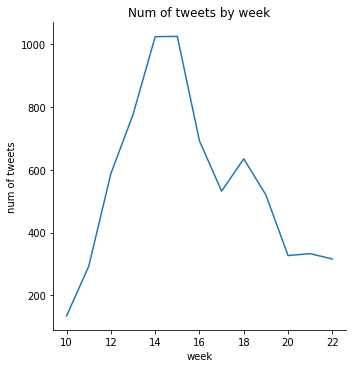

In [57]:
sns.relplot(data=d_w, x="week", y="num of tweets", kind="line")
plt.title('Num of tweets by week', fontsize=12);

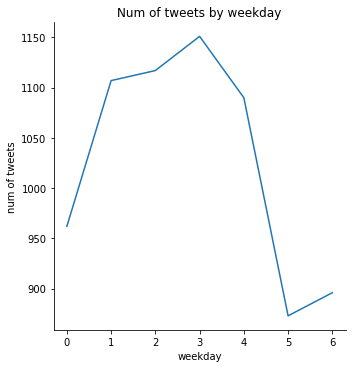

In [33]:
sns.relplot(data=d_wd, x="weekday", y="num of tweets", kind="line")
plt.title('Num of tweets by weekday', fontsize=12);

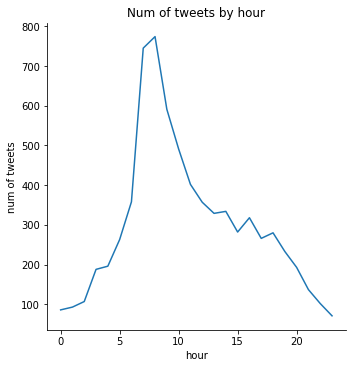

In [35]:
sns.relplot(data=d_h, x="hour", y="num of tweets", kind="line")
plt.title('Num of tweets by hour', fontsize=12);

#### topic vis

In [7]:
en.loc[:,'date'] = pd.to_datetime(en['date'], format='%a %b %d %H:%M:%S %z %Y')


In [8]:
en.loc[:, 'weekday'] = en.date.dt.weekday
en.loc[:, 'week'] = en.date.dt.week
en.loc[:, 'hour'] = en.date.dt.hour
en.loc[:, 'month'] = en.date.dt.month
en

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,date,best_topic_weights,best_topic_label,sentiment_an,weekday,week,hour,month
id,,,,,,,,
0,2020-05-11 17:13:00+00:00,0.588400,2,"{'verb': 0.08333333333333333, 'present': 0.083...",0,20,17,5
1,2020-03-23 08:49:20+00:00,0.335351,17,"{'affect': 0.2, 'negemo': 0.2, 'anx': 0.2, 're...",0,13,8,3
2,2020-05-25 18:05:05+00:00,0.570149,1,"{'cogmech': 0.2222222222222222, 'inhib': 0.111...",0,22,18,5
3,2020-04-24 17:21:24+00:00,0.866665,11,"{'work': 0.06666666666666667, 'verb': 0.066666...",4,17,17,4
4,2020-05-31 00:17:34+00:00,0.617481,4,"{'motion': 0.14285714285714285, 'relativ': 0.1...",6,22,0,5
...,...,...,...,...,...,...,...,...
128561,2020-04-17 14:50:26+00:00,0.564351,12,"{'bio': 0.25, 'health': 0.25, 'cogmech': 0.25,...",4,16,14,4
128562,2020-03-31 16:37:19+00:00,0.848030,4,"{'funct': 0.5, 'quant': 0.5}",1,14,16,3
128563,2020-05-07 15:27:58+00:00,0.823341,8,"{'time': 0.1, 'relativ': 0.1, 'affect': 0.1, '...",3,19,15,5


In [19]:
topic_names_en = [
    'Амер.политика',
    'Брит.политика',
    'Медицина',
    'Экономика',
    'Мир',
    'Защита',
    'Ограничения',
    'Трагедия',
    'Амер.политика2',
    'Медиа',
    'Ограничения2',
    'Общ.жизнь',
    'Амер.политика3',
    'Статистика',
     'Онлайн',
     'Медицина2',
     'Медицина3',
]

In [20]:
labels_weeks_en = en[['best_topic_label', 'week', 'date']].groupby(['best_topic_label', 'week'], as_index=False).count()
labels_weeks_en.rename(columns={'best_topic_label':'label', 'date':'num tweets'}, inplace=True)
labels_weeks_en

,label,week,num tweets
0,1,10,358
1,1,11,385
2,1,12,404
3,1,13,477
4,1,14,533
5,1,15,494
6,1,16,540
7,1,17,554
8,1,18,546
9,1,19,573


In [21]:
for i in range(0, len(topic_names_en)):
  labels_weeks_en.loc[(labels_weeks_en['label'] == i+1), 'n'] = topic_names_en[i]
labels_weeks_en

,label,week,num tweets,n
0,1,10,358,Амер.политика
1,1,11,385,Амер.политика
2,1,12,404,Амер.политика
3,1,13,477,Амер.политика
4,1,14,533,Амер.политика
5,1,15,494,Амер.политика
6,1,16,540,Амер.политика
7,1,17,554,Амер.политика
8,1,18,546,Амер.политика
9,1,19,573,Амер.политика


In [25]:
pd.set_option('display.max_rows', 10)
# labels_weeks_en

,label,week,num tweets,n
0,1,10,358,Амер.политика
1,1,11,385,Амер.политика
2,1,12,404,Амер.политика
3,1,13,477,Амер.политика
4,1,14,533,Амер.политика
...,...,...,...,...
216,17,18,521,Медицина3
217,17,19,552,Медицина3
218,17,20,549,Медицина3
219,17,21,576,Медицина3


In [24]:
df = px.data.gapminder()
fig = px.area(labels_weeks_en, x="week", y="num tweets", color="n", groupnorm = 'percent',width=800, height=500)
fig.show()

In [52]:
en[en.best_topic_weights > 0.6]

,date,best_topic_weights,best_topic_label,sentiment_an,weekday,hour,month
id,,,,,,,


In [49]:
confident_data_en = en[en.best_topic_weights > 0.5]


d_w = confident_data_en.groupby(['weekday'], as_index=False).agg(['count'])['date']
d_h = confident_data_en.groupby(['hour'], as_index=False).agg(['count'])['date']

d_w.rename(columns={'count':'num of tweets'}, inplace=True)
d_h.rename(columns={'count':'num of tweets'}, inplace=True)


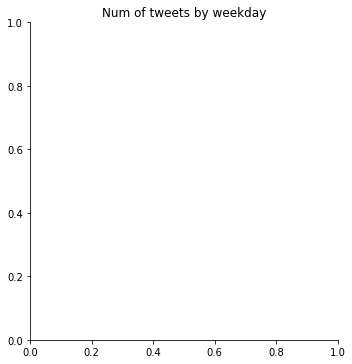

In [50]:
sns.relplot(data=d_w, x="weekday", y="num of tweets", kind="line")
plt.title('Num of tweets by weekday', fontsize=12);

In [ ]:
sns.relplot(data=d_h, x="hour", y="num of tweets", kind="line")
plt.title('Num of tweets by hour', fontsize=12);